In [1]:
import os
os.chdir(r"C:\Users\dell\Desktop\Github\ML")
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#'''******Importing the dataset *********************************************'''
df = pd.read_csv('ccpp.csv')
ccpp = df.copy(True)

In [3]:
#Details  of the Attributes
ccpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
#calculating some statistical data like percentile, mean and std of the numerical values
ccpp.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [5]:
ccpp.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,9568.0,19.651231,7.452473,1.81,13.5100,20.345,25.72,37.11
V,9568.0,54.305804,12.707893,25.36,41.7400,52.080,66.54,81.56
AP,9568.0,1013.259078,5.938784,992.89,1009.1000,1012.940,1017.26,1033.30
RH,9568.0,73.308978,14.600269,25.56,63.3275,74.975,84.83,100.16
PE,9568.0,454.365009,17.066995,420.26,439.7500,451.550,468.43,495.76


In [6]:
ccpp.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [7]:
ccpp.shape

(9568, 5)

In [8]:
ccpp.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

**''''As we dont have missing values we don't need to handle missing values and
our dataset does not contains categorical data so Encoding is not required**


In [9]:
#'''***************** Initiating independent=X and Dependent=y Variables*****'''
X = ccpp.drop(['PE'], axis = 1)
y = ccpp.PE


In [10]:
#''******* Splitting the dataset into the Training set and Test set**********'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [11]:
#'''*****# Training the Linear Regression model on the Training set*****'''
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
#'''************# Predicting the Test set results****************************'''
y_pred = regressor.predict(X_test)

y_pred1 = pd.DataFrame(regressor.predict(X_test))
y1 = y_pred1.to_numpy()
np.set_printoptions(precision=2)
y2= y_test.to_numpy()
np.set_printoptions(precision=2)
print(np.concatenate((y1.reshape(len(y1),1),y2.reshape(len(y2),1)),1))

[[433.36 426.18]
 [448.39 451.1 ]
 [445.89 442.87]
 ...
 [456.06 454.2 ]
 [446.91 444.13]
 [432.57 436.58]]


In [13]:
#'''*************Evaluating the Model Performance****************************'''
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.929899469443679

In [14]:
#'''******************Backward Elimination with preparing X_train for adjusted R2'''
import statsmodels.api as sm
X1 = sm.add_constant(X_train) #are we doing this for adjusted r2?
ols = sm.OLS(y_train, X1)
lr = ols.fit()

In [15]:
#Displaying the P-Values
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.479e+04
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:13:30   Log-Likelihood:                -22495.
No. Observations:                7654   AIC:                         4.500e+04
Df Residuals:                    7649   BIC:                         4.503e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        449.5316     10.988     40.912      0.0

**'''As p values of all varaible are less than significance value so 
we don't need to drop any variable except constant'''**


In [16]:
X_train = X1.drop('const', axis=1)
X_train

,AT,V,AP,RH
496,15.15,53.82,1016.34,62.59
294,25.35,74.33,1015.29,77.84
6796,18.38,55.28,1020.22,68.33
6785,29.06,64.96,1000.88,62.07
1203,24.26,68.14,1005.09,59.49
...,...,...,...,...
7891,30.05,73.68,1014.95,70.60
9225,11.34,45.17,1018.32,96.24
4859,23.55,73.18,1011.85,87.97
3264,20.74,58.12,1015.43,77.88


In [17]:
X_train.columns

Index(['AT', 'V', 'AP', 'RH'], dtype='object')

<AxesSubplot:>

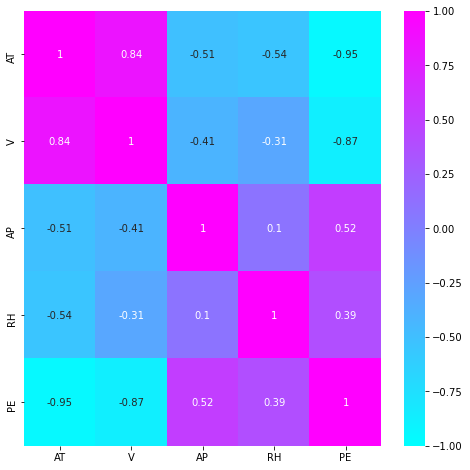

In [18]:
#'''******************* Correlation Matrix & Heat Map************************'''
import seaborn as sns
f,ax = plt.subplots(figsize=(8, 8))
corr_ccpp=ccpp.corr()
sns.heatmap(corr_ccpp, vmin = -1, vmax = 1, annot = True, cmap= 'cool')


In [19]:
#'''****************Finding the value of Intercept & Cofficient for all X Variables'''
print(regressor.intercept_)
print(regressor.coef_)

449.5316269983783
[-1.98 -0.23  0.07 -0.16]


In [20]:
regressor.intercept_

449.5316269983783

In [21]:
regressor.coef_

array([-1.98, -0.23,  0.07, -0.16])

In [22]:
#'''************ Mean Absolute Error and Mean Squared Error********************'''
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_abs_error = mean_absolute_error(y_test,y_pred)
mean_abs_error

3.630457657633138

In [23]:
mean_sq_error = mean_squared_error(y_test,y_pred)
mean_sq_error

20.218249777037887

In [24]:
#'''*********************Finding R-Square ***********************************'''
R2_test = regressor.score(X_test,y_test)
R2_test

0.929899469443679

In [25]:
#'''*********************K-FOLD ***********************************'''
from sklearn.model_selection import cross_val_score
cross_val_score(regressor,X,y,cv=4) 

array([0.93, 0.92, 0.93, 0.93])

In [26]:
# Cheking mean value of the scores of k-fold
cross_val_score(regressor,X,y,cv=4).mean()

0.9284917507488122

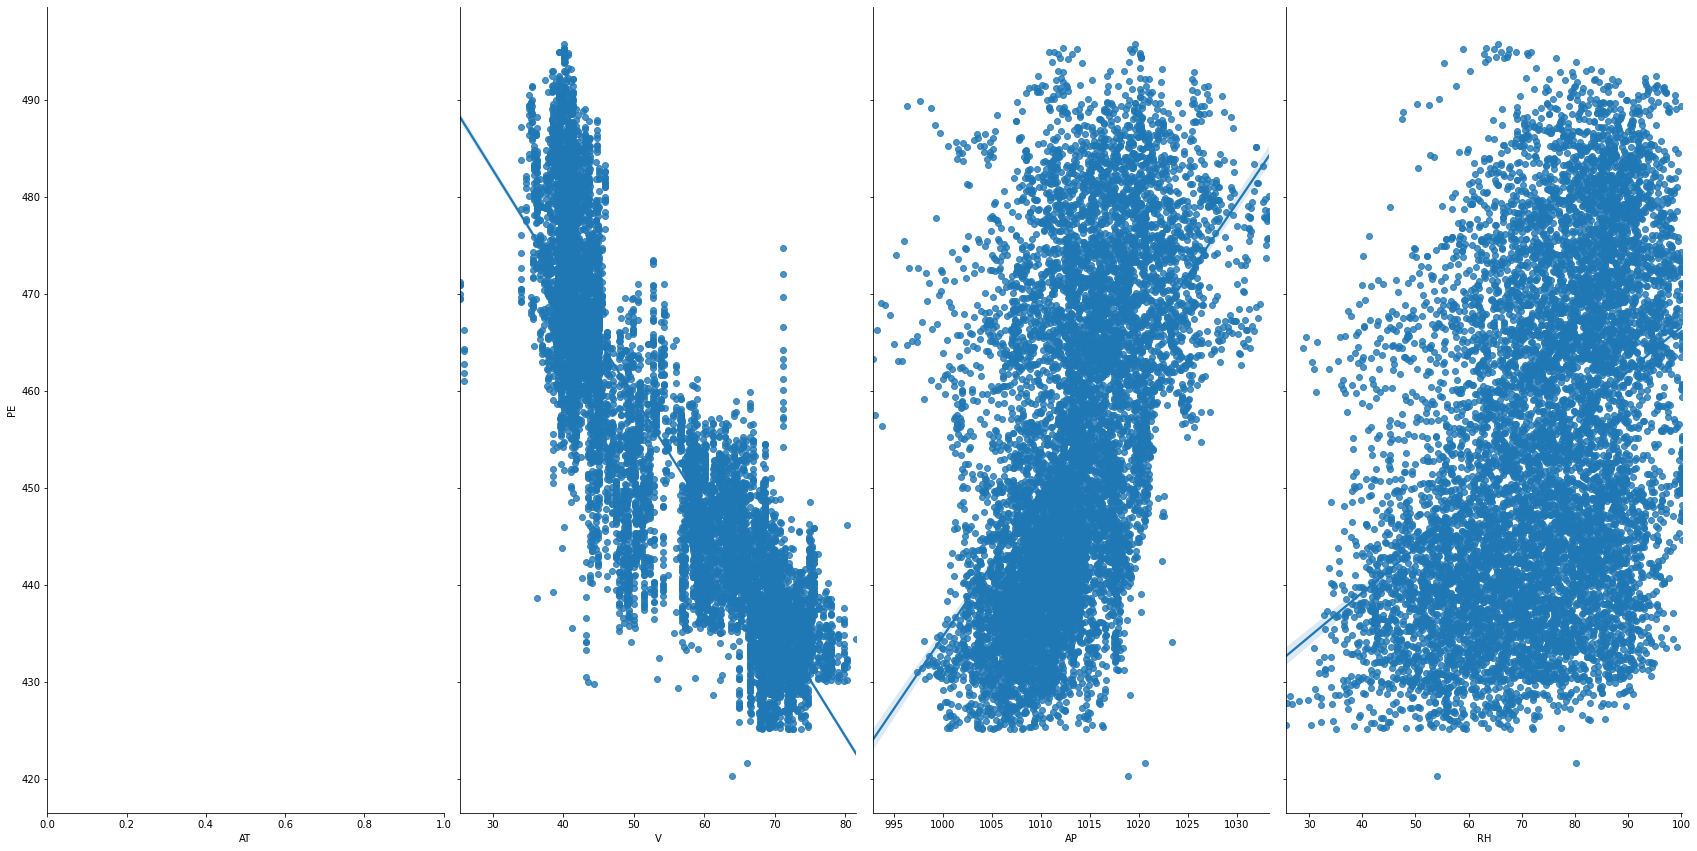

In [27]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(ccpp, x_vars=['AT','V','AP','RH'], y_vars='PE', size=12, aspect=0.5,kind='reg')

# '''******POLYNOMIAL REGRESSION *********************************************'''


In [28]:
#'''******Importing the dataset **********************'''
dataset = pd.read_csv('ccpp.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [29]:
#'''******* Splitting the dataset into the Training set and Test set**********'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [30]:
#'''*******Training the Polynomial Regression model on the Training set**********'''
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
regressorp = LinearRegression()
regressorp.fit(X_poly, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
# Predicting the Test set results
y_pred = regressorp.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[431.67 426.18]
 [448.12 451.1 ]
 [444.28 442.87]
 ...
 [455.26 454.2 ]
 [446.82 444.13]
 [433.75 436.58]]


In [32]:
#'''*********************Evaluating the Model Performance with R-Square *********'''
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9411551487152068

In [33]:
import statsmodels.api as sm
X1 = sm.add_constant(X_poly) #are we doing this for adjusted r2?
ols = sm.OLS(y_train, X1)
lr = ols.fit()

In [34]:
#Displaying the P-Values
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     3657.
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:14:00   Log-Likelihood:                -21779.
No. Observations:                7654   AIC:                         4.363e+04
Df Residuals:                    7620   BIC:                         4.386e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6516      0.835      0.781      0.4

In [35]:
#'''************ Mean Absolute Error and Mean Squared Error********************'''
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_abs_error = mean_absolute_error(y_test,y_pred)
mean_abs_error


3.273550081982203

In [36]:
mean_sq_error = mean_squared_error(y_test,y_pred)
mean_sq_error


16.97191008294469

<AxesSubplot:>

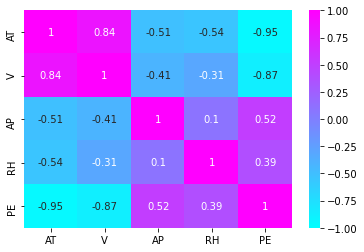

In [37]:
#'''******************* Correlation Matrix & Heat Map************************'''
import seaborn as sns
corr_ccpp=dataset.corr()
sns.heatmap(corr_ccpp, vmin = -1, vmax = 1, annot = True, cmap= 'cool')

In [38]:
#'''*********************K-FOLD ***********************************'''
from sklearn.model_selection import cross_val_score
cross_val_score(regressorp,X,y,cv=4) 

array([0.93, 0.92, 0.93, 0.93])

In [39]:
# Cheking mean value of the scores of k-fold
cross_val_score(regressorp,X,y,cv=4).mean()

0.9284917507488124

# '''**************#RANDOM FOREST REGRESSION**********************************'''


In [40]:
# Training the Random Forest Regression model on the whole dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [41]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[431.87 426.18]
 [449.24 451.1 ]
 [441.06 442.87]
 ...
 [454.12 454.2 ]
 [446.46 444.13]
 [435.76 436.58]]


In [42]:
#'''**************Evaluating the Model Performance with R-Square *********'''
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.9600237508898216

# '''**************## Support Vector Regression (SVR)**********************************'''

In [43]:
# Importing the dataset
dataset = pd.read_csv('CCPP.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
y = y.reshape(len(y),1)

In [44]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [45]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

In [46]:
# Training the SVR model on the Training set
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [47]:
# Predicting the Test set results
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[431.22 426.18]
 [448.88 451.1 ]
 [444.04 442.87]
 ...
 [455.18 454.2 ]
 [447.12 444.13]
 [432.72 436.58]]


In [48]:
# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.945384075850576

# <center>Thank You.......